In [68]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np

img = cv2.imread('circulo.png')

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

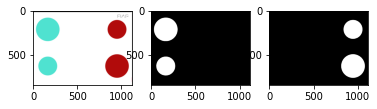

In [69]:
# Definição dos valores minimo e max da mascara
# o magenta tem h=300 mais ou menos ou 150 para a OpenCV
image_lower_hsv_cian = np.array([85, 122, 122])  
image_upper_hsv_cian = np.array([90, 255, 255])
image_lower_hsv_red = np.array([0, 122, 122])  
image_upper_hsv_red = np.array([7, 255, 255])


mask_hsv_cian = cv2.inRange(img_hsv, image_lower_hsv_cian, image_upper_hsv_cian)
mask_hsv_red = cv2.inRange(img_hsv, image_lower_hsv_red, image_upper_hsv_red)


plt.subplot(1, 3, 1)
plt.imshow(img_rgb)
plt.subplot(1, 3, 2)
plt.imshow(mask_hsv_cian, cmap="Greys_r", vmin=0, vmax=255)
plt.subplot(1, 3, 3)
plt.imshow(mask_hsv_red, cmap="Greys_r", vmin=0, vmax=255)
plt.show()

In [70]:
contornos_cian, _ = cv2.findContours(mask_hsv_cian, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contornos_red, _ = cv2.findContours(mask_hsv_red, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
mask_rgb_cian = cv2.cvtColor(mask_hsv_cian, cv2.COLOR_GRAY2RGB)
mask_rgb_red = cv2.cvtColor(mask_hsv_red, cv2.COLOR_GRAY2RGB)
contornosCian_img = mask_rgb_cian.copy() 
contornosRed_img = mask_rgb_red.copy() # Cópia da máscara para ser desenhada "por cima"

#print(len(contornos))
print(contornos_red)

[array([[[ 937,  488]],

       [[ 936,  489]],

       [[ 927,  489]],

       [[ 926,  490]],

       [[ 921,  490]],

       [[ 920,  491]],

       [[ 917,  491]],

       [[ 916,  492]],

       [[ 912,  492]],

       [[ 911,  493]],

       [[ 909,  493]],

       [[ 908,  494]],

       [[ 906,  494]],

       [[ 905,  495]],

       [[ 902,  495]],

       [[ 901,  496]],

       [[ 900,  496]],

       [[ 899,  497]],

       [[ 897,  497]],

       [[ 896,  498]],

       [[ 895,  498]],

       [[ 894,  499]],

       [[ 892,  499]],

       [[ 891,  500]],

       [[ 890,  500]],

       [[ 889,  501]],

       [[ 888,  501]],

       [[ 887,  502]],

       [[ 886,  502]],

       [[ 885,  503]],

       [[ 884,  503]],

       [[ 883,  504]],

       [[ 882,  504]],

       [[ 880,  506]],

       [[ 879,  506]],

       [[ 878,  507]],

       [[ 877,  507]],

       [[ 875,  509]],

       [[ 874,  509]],

       [[ 872,  511]],

       [[ 871,  511]],

       [[ 869, 

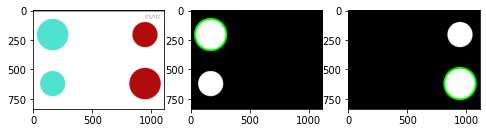

In [71]:
## Implemente seu código


maior_red = None
maior_cian = None
maior_area_red = 0
maior_area_cian = 0
for c in contornos_red:
    area = cv2.contourArea(c)
    if area > maior_area_red:
        maior_area_red = area
        maior_red = c
        cnt_red = contornos_red[0]
        M_red = cv2.moments(cnt_red)

for d in contornos_cian:
    area = cv2.contourArea(d)
    if area > maior_area_cian:
        maior_area_cian = area
        maior_cian = d
        cnt_cian = contornos_cian[1]
        M_cian = cv2.moments(cnt_cian)

        
cv2.drawContours(contornosRed_img, [maior_red], -1, [0, 255, 0], 15)
cv2.drawContours(contornosCian_img, [maior_cian], -1, [0, 255, 0], 15)


plt.figure(figsize=(8,6))
plt.subplot(1, 3, 1)
plt.imshow(img_rgb)
plt.subplot(1, 3, 2)
plt.imshow(contornosCian_img, cmap="Greys_r", vmin=0, vmax=255)
plt.subplot(1, 3, 3)
plt.imshow(contornosRed_img, cmap="Greys_r", vmin=0, vmax=255)
plt.show()

In [59]:
cx_cian = int(M_cian['m10']/M_cian['m00'])
cy_cian = int(M_cian['m01']/M_cian['m00'])

print("centro de massa do maior circulo ciano na possição: ",cx_cian, cy_cian)

centro de massa do maior circulo ciano na possição:  165 206


In [60]:
cx_red = int(M_red['m10']/M_red['m00'])
cy_red = int(M_red['m01']/M_red['m00'])

print("centro de massa do maior circulo vermelho na possição: ",cx_red, cy_red)

centro de massa do maior circulo vermelho na possição:  945 620


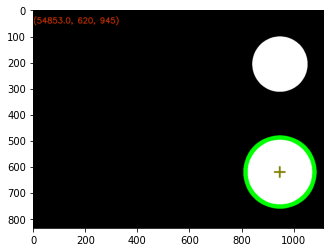

In [61]:
size = 20
color = (128,128,0)


cv2.line(contornosRed_img,(cx_red - size,cy_red),(cx_red + size,cy_red),color,5)
cv2.line(contornosRed_img,(cx_red,cy_red - size),(cx_red, cy_red + size),color,5)

# Para escrever vamos definir uma fonte 

font = cv2.FONT_HERSHEY_SIMPLEX
text = maior_area_red, cy_red , cx_red
origem = (0,50)

cv2.putText(contornosRed_img, str(text), origem, font,1,(200,50,0),2,cv2.LINE_AA)


plt.imshow(contornosRed_img);

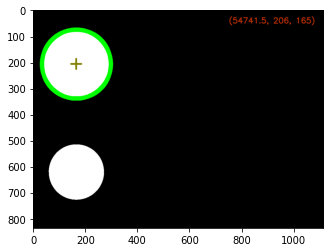

In [62]:
size = 20
color = (128,128,0)


cv2.line(contornosCian_img,(cx_cian - size,cy_cian),(cx_cian + size,cy_cian),color,5)
cv2.line(contornosCian_img,(cx_cian,cy_cian - size),(cx_cian, cy_cian + size),color,5)

# Para escrever vamos definir uma fonte 

font = cv2.FONT_HERSHEY_SIMPLEX
text = maior_area_cian, cy_cian , cx_cian
origem = (750,50)

cv2.putText(contornosCian_img, str(text), origem, font,1,(200,50,0),2,cv2.LINE_AA)


plt.imshow(contornosCian_img);

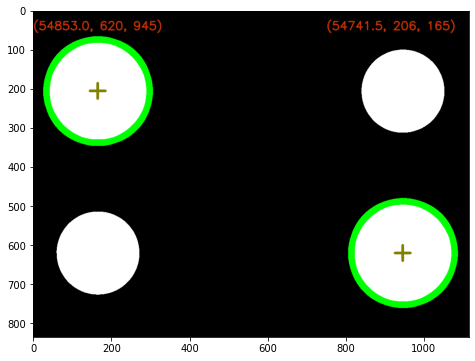

In [63]:
saida = cv2.bitwise_or(contornosRed_img,contornosCian_img)
plt.figure(figsize=(8,6))
plt.imshow(saida)
plt.show()

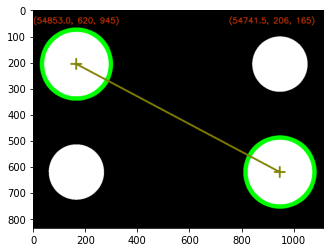

In [64]:
color = (128,128,0)

cv2.line(saida,(cx_red , cy_red),(cx_cian , cy_cian),color,5)
plt.imshow(saida)
plt.show()

In [65]:
p1=(cx_cian,cy_cian)
p2=(cx_red,cy_red)
ang1 = np.arctan2(*p1[::-1])
ang2 = np.arctan2(*p2[::-1])
angulo_retas = np.rad2deg((ang1 - ang2) % (2 * np.pi))
print("Valor entre as retas",int(angulo_retas))

Valor entre as retas 18


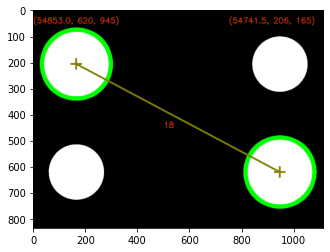

In [66]:
# Para escrever vamos definir uma fonte 

font = cv2.FONT_HERSHEY_SIMPLEX
text = int(angulo_retas)
origem = (500,450)

cv2.putText(saida, str(text), origem, font,1,(200,50,0),2,cv2.LINE_AA)


plt.imshow(saida);